In [1]:
import matplotlib.pyplot as plt
from datasets import load_dataset
from profanity_check import predict
import numpy as np

In [2]:
# Load the datasets
datasets = {
    "imdb": load_dataset("imdb", split='train[:10%]'),  # get only 10% of train split
    "yelp_polarity": load_dataset("yelp_polarity", split='train[:10%]')
    # add more datasets as desired
}

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /Users/rami/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


Generating train split:   0%|          | 0/560000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/38000 [00:00<?, ? examples/s]

Dataset yelp_polarity downloaded and prepared to /Users/rami/.cache/huggingface/datasets/yelp_polarity/plain_text/1.0.0/14f90415c754f47cf9087eadac25823a395fef4400c7903c5897f55cfaaa6f61. Subsequent calls will reuse this data.


In [3]:
profanity_distribution = {}

# Process each dataset
for name, dataset in datasets.items():
    texts = dataset['text']
    profanity_scores = predict(texts)
    profanity_distribution[name] = np.mean(profanity_scores)

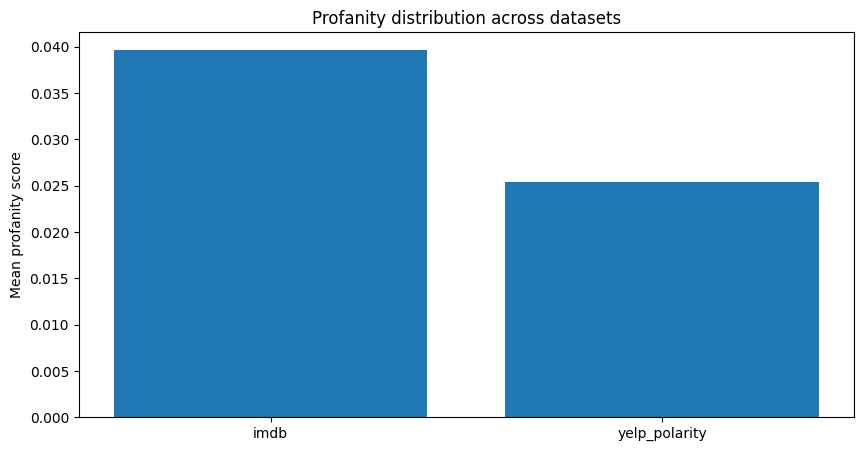

In [4]:
# Visualize the distribution
names = list(profanity_distribution.keys())
values = list(profanity_distribution.values())

plt.figure(figsize=(10, 5))
plt.bar(names, values)
plt.title('Profanity distribution across datasets')
plt.ylabel('Mean profanity score')
plt.show()